<a href="https://colab.research.google.com/github/divyanshsaxena21/Waste_Classification/blob/main/Waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download sumn2u/garbage-classification-v2

Dataset URL: https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2
License(s): MIT
 98% 729M/744M [00:04<00:00, 154MB/s]
100% 744M/744M [00:04<00:00, 156MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/garbage-classification-v2.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

In [ ]:
dataset_dir = '/content/garbage-dataset'  # Path to your dataset
train_dir = '/content/train'  # Path for the training set
test_dir = '/content/test'  # Path for the testing set
test_size = 0.2  # Proportion of data for testing (e.g., 0.2 for 20%)

In [ ]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)
    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)  # Use random_state for reproducibility

    # Move images to respective directories
    for image in train_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(train_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in test_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(test_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')  # 10 categories
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Define image size
img_size = (128, 128)

# Prepare data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Flip images randomly
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize images

train_generator = train_datagen.flow_from_directory(
    '/content/train',  # Correct path to train data
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',  # Correct path to test data
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)


Found 15806 images belonging to 10 classes.
Found 3956 images belonging to 10 classes.


In [ ]:
print("Training class indices:", train_generator.class_indices)
print("Number of training samples:", train_generator.samples)
print("Number of test samples:", validation_generator.samples)


Training class indices: {'battery': 0, 'biological': 1, 'cardboard': 2, 'clothes': 3, 'glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'trash': 9}
Number of training samples: 15806
Number of test samples: 3956


In [ ]:
x_batch, y_batch = next(train_generator)
print(x_batch.shape)  # Should print (batch_size, img_height, img_width, 3)
print(y_batch.shape)

(32, 128, 128, 3)
(32, 10)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


493/493 ━━━━━━━━━━━━━━━━━━━━ 464s 935ms/step - accuracy: 0.3303 - loss: 1.9621 - val_accuracy: 0.4822 - val_loss: 1.5293
Epoch 2/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 275us/step - accuracy: 0.4688 - loss: 1.4565 - val_accuracy: 0.5500 - val_loss: 1.2711
Epoch 3/20


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


493/493 ━━━━━━━━━━━━━━━━━━━━ 455s 921ms/step - accuracy: 0.4445 - loss: 1.6285 - val_accuracy: 0.5396 - val_loss: 1.3151
Epoch 4/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 245us/step - accuracy: 0.4375 - loss: 1.4384 - val_accuracy: 0.5500 - val_loss: 1.1811
Epoch 5/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 455s 920ms/step - accuracy: 0.4919 - loss: 1.4951 - val_accuracy: 0.5376 - val_loss: 1.3100
Epoch 6/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 224us/step - accuracy: 0.5938 - loss: 1.1744 - val_accuracy: 0.6000 - val_loss: 1.3025
Epoch 7/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 454s 918ms/step - accuracy: 0.5158 - loss: 1.4191 - val_accuracy: 0.5279 - val_loss: 1.3915
Epoch 8/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.5938 - loss: 1.4530 - val_accuracy: 0.7000 - val_loss: 0.8091
Epoch 9/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 454s 918ms/step - accuracy: 0.5338 - loss: 1.3654 - val_accuracy: 0.6118 - val_loss: 1.1139
Epoch 10/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 214us/step - accuracy: 0.4375 - loss: 1.7249 - va

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 225ms/step - accuracy: 0.6663 - loss: 1.0360
Test accuracy: 0.658790647983551
Test loss: 1.0662403106689453


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess a new image
img_path = input("Enter path: \n")  # Path to your new image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())  # Get class labels from the generator

# Print the predicted class
print("Predicted class:", class_labels[predicted_class_index])

Enter path: 
/content/test/battery/battery_122.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: battery


Enter image path: 
/content/test/plastic/plastic_101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: plastic


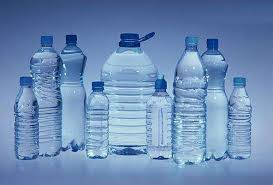

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

# Load and preprocess a new image
img_path = input("Enter image path: \n")  # Path to your new image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())  # Get class labels from the generator

# Print the predicted class
print("Predicted class:", class_labels[predicted_class_index])

# Display the image using IPython.display.Image
display(Image(filename=img_path))